<a href="https://colab.research.google.com/github/Vikie2233/Assingment/blob/main/Vehicle_Population_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

Loading the Dataset

In [2]:
data=pd.read_csv("/content/archive (6).zip")

In [3]:
#Display the first rows
data.head(5)

,Sr No.,Year,Region,Category,Motor Cycles,Scooters,Moped,Cars,Jeeps,Stn. Wagons,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,2000-2001,Greater Mumbai,Mumbai(C),84289.0,62444,7289,164758,12727,2705,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2000-2001,Greater Mumbai,Mumbai(W),80320.0,96297,15230,110397,5465,962,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,2000-2001,Greater Mumbai,Mumbai€,39930.0,44932,9786,42945,4439,472,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,2000-2001,Greater Mumbai,Borivali,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2000-2001,Thane Region,Thane,130448.0,104028,9304,96933,23755,730,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


In [4]:
#Checking Data type
data.dtypes

Sr No.                            int64
Year                             object
Region                           object
Category                         object
Motor Cycles                    float64
Scooters                          int64
Moped                             int64
Cars                              int64
Jeeps                             int64
Stn. Wagons                       int64
Taxis meter fited                 int64
Luxury /Turist Cabs/              int64
Auto-rikshaws                     int64
Stage carriages                   int64
Contract carriages /Mini Bus      int64
School Buses                      int64
Private Service Vehicles          int64
Ambulances                        int64
Articulated/Multi.                int64
Trucks & Lorries                  int64
Tanker                            int64
Delivery Van (4 wheelers)         int64
Delivery Van (3 wheelers)         int64
Tractors                          int64
Trailors                          int64


In [5]:
#Printing the Sum of Missing Values in the Column
print(data.isnull().sum())

Sr No.                          0
Year                            0
Region                          0
Category                        0
Motor Cycles                    0
Scooters                        0
Moped                           0
Cars                            0
Jeeps                           0
Stn. Wagons                     0
Taxis meter fited               0
Luxury /Turist Cabs/            0
Auto-rikshaws                   0
Stage carriages                 0
Contract carriages /Mini Bus    0
School Buses                    0
Private Service Vehicles        0
Ambulances                      0
Articulated/Multi.              0
Trucks & Lorries                0
Tanker                          0
Delivery Van (4 wheelers)       0
Delivery Van (3 wheelers)       0
Tractors                        0
Trailors                        0
Others                          0
dtype: int64


In [6]:
#Getting the value counts for "Year" column
data['Year'].value_counts()

Year
2000-2001    50
2001-2002    50
2016-2017    50
2015-2016    50
2014-2015    50
2013-2014    50
2012-2013    50
2011-2012    50
2010-2011    50
2009-2010    50
2008-2009    50
2007-2008    50
2006-2007    50
2005-2006    50
2004-2005    50
2003-2004    50
2002-2003    50
2017-2018    50
Name: count, dtype: int64

Release Year

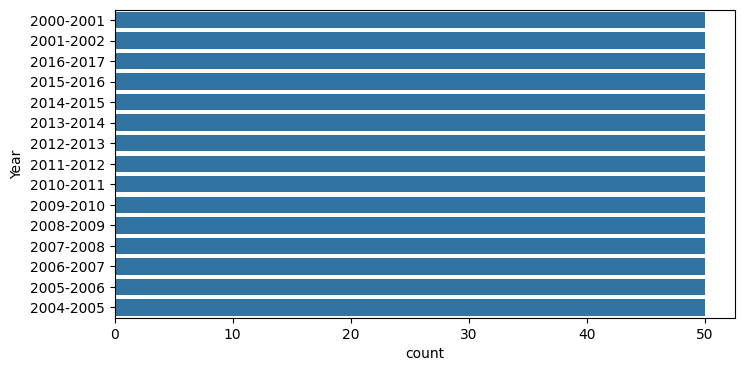

In [7]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='Year', data=data, order=data.Year.value_counts().index[:15])

In [8]:
print(data.columns)

Index(['Sr No.', 'Year', 'Region', 'Category', 'Motor Cycles', 'Scooters',
       'Moped', 'Cars', 'Jeeps', 'Stn. Wagons', 'Taxis meter fited',
       'Luxury /Turist Cabs/', 'Auto-rikshaws', 'Stage carriages',
       'Contract carriages /Mini Bus', 'School Buses',
       'Private Service Vehicles', 'Ambulances', 'Articulated/Multi.',
       'Trucks & Lorries', 'Tanker', 'Delivery Van (4 wheelers)',
       'Delivery Van (3 wheelers)', 'Tractors', 'Trailors', 'Others'],
      dtype='object')


In [9]:
data['Motor Cycles'].value_counts()

Motor Cycles
0.0         87
92577.0      2
140030.0     2
84289.0      1
92812.0      1
            ..
2902.0       1
2465.0       1
103110.0     1
77631.0      1
136961.0     1
Name: count, Length: 812, dtype: int64

Encoding

In [10]:
!pip install sklearn.preprocessing

In [11]:
#importing ordinal encoding from sklearn
from sklearn.preprocessing import OrdinalEncoder
#Defining order of categories accoding to columns
oe=OrdinalEncoder(categories=[['SE','MI','EN','EX'],['FT','PT','CT','ST','FL'],['M','L','S']])

In [12]:
data.dtypes

Sr No.                            int64
Year                             object
Region                           object
Category                         object
Motor Cycles                    float64
Scooters                          int64
Moped                             int64
Cars                              int64
Jeeps                             int64
Stn. Wagons                       int64
Taxis meter fited                 int64
Luxury /Turist Cabs/              int64
Auto-rikshaws                     int64
Stage carriages                   int64
Contract carriages /Mini Bus      int64
School Buses                      int64
Private Service Vehicles          int64
Ambulances                        int64
Articulated/Multi.                int64
Trucks & Lorries                  int64
Tanker                            int64
Delivery Van (4 wheelers)         int64
Delivery Van (3 wheelers)         int64
Tractors                          int64
Trailors                          int64


In [13]:
!pip install sklearn.preprocessing

In [14]:
#importing ordinal encoding from sklearn
from sklearn.preprocessing import OrdinalEncoder
#Defining order of categories accoding to columns
oe=OrdinalEncoder(categories=[['SE','MI','EN','EX'],['FT','PT','CT','ST','FL'],['M','L','S']])

In [15]:
#Initializing OrdinalEncoder
data[['Year','Region','Category']]

,Year,Region,Category
0,2000-2001,Greater Mumbai,Mumbai(C)
1,2000-2001,Greater Mumbai,Mumbai(W)
2,2000-2001,Greater Mumbai,Mumbai€
3,2000-2001,Greater Mumbai,Borivali
4,2000-2001,Thane Region,Thane
...,...,...,...
895,2017-2018,Nagpur(R) Region,Nagpur\rRural
896,2017-2018,Nagpur(R) Region,Gad\rchiroli
897,2017-2018,Nagpur(R) Region,Chandra\rpur
898,2017-2018,Nagpur(R) Region,Gondia


In [16]:
data['Year'].value_counts()

Year
2000-2001    50
2001-2002    50
2016-2017    50
2015-2016    50
2014-2015    50
2013-2014    50
2012-2013    50
2011-2012    50
2010-2011    50
2009-2010    50
2008-2009    50
2007-2008    50
2006-2007    50
2005-2006    50
2004-2005    50
2003-2004    50
2002-2003    50
2017-2018    50
Name: count, dtype: int64

In [17]:
# importing labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_en= LabelEncoder()

#fit labelencoding from sklearn
data['Year']= label_en.fit_transform (data['Year'])
data['Category']= label_en.fit_transform (data['Category'])
data['Region']= label_en.fit_transform (data['Region'])

In [18]:
data.head()

,Sr No.,Year,Region,Category,Motor Cycles,Scooters,Moped,Cars,Jeeps,Stn. Wagons,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,0,3,35,84289.0,62444,7289,164758,12727,2705,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,0,3,36,80320.0,96297,15230,110397,5465,962,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,0,3,37,39930.0,44932,9786,42945,4439,472,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,0,3,14,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,12,64,130448.0,104028,9304,96933,23755,730,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


Exploring the Data

<Axes: xlabel='Category'>

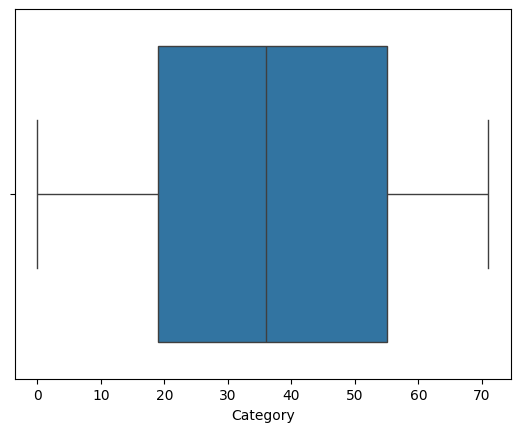

In [19]:
sns.boxplot(x=data["Category"])

Converting Category to string

In [20]:
data['Category'] = data['Category'].astype(str)
data = data[data['Category'].apply(lambda x: x.isnumeric())]

In [32]:
data.head()

,Sr No.,Year,Region,Category,Motor Cycles,Scooters,Moped,Cars,Jeeps,Stn. Wagons,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,0,3,12727.0,84289.0,62444,7289,164758,12727,2705,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,0,3,5465.0,80320.0,96297,15230,110397,5465,962,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,0,3,4439.0,39930.0,44932,9786,42945,4439,472,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,0,3,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,12,23755.0,130448.0,104028,9304,96933,23755,730,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


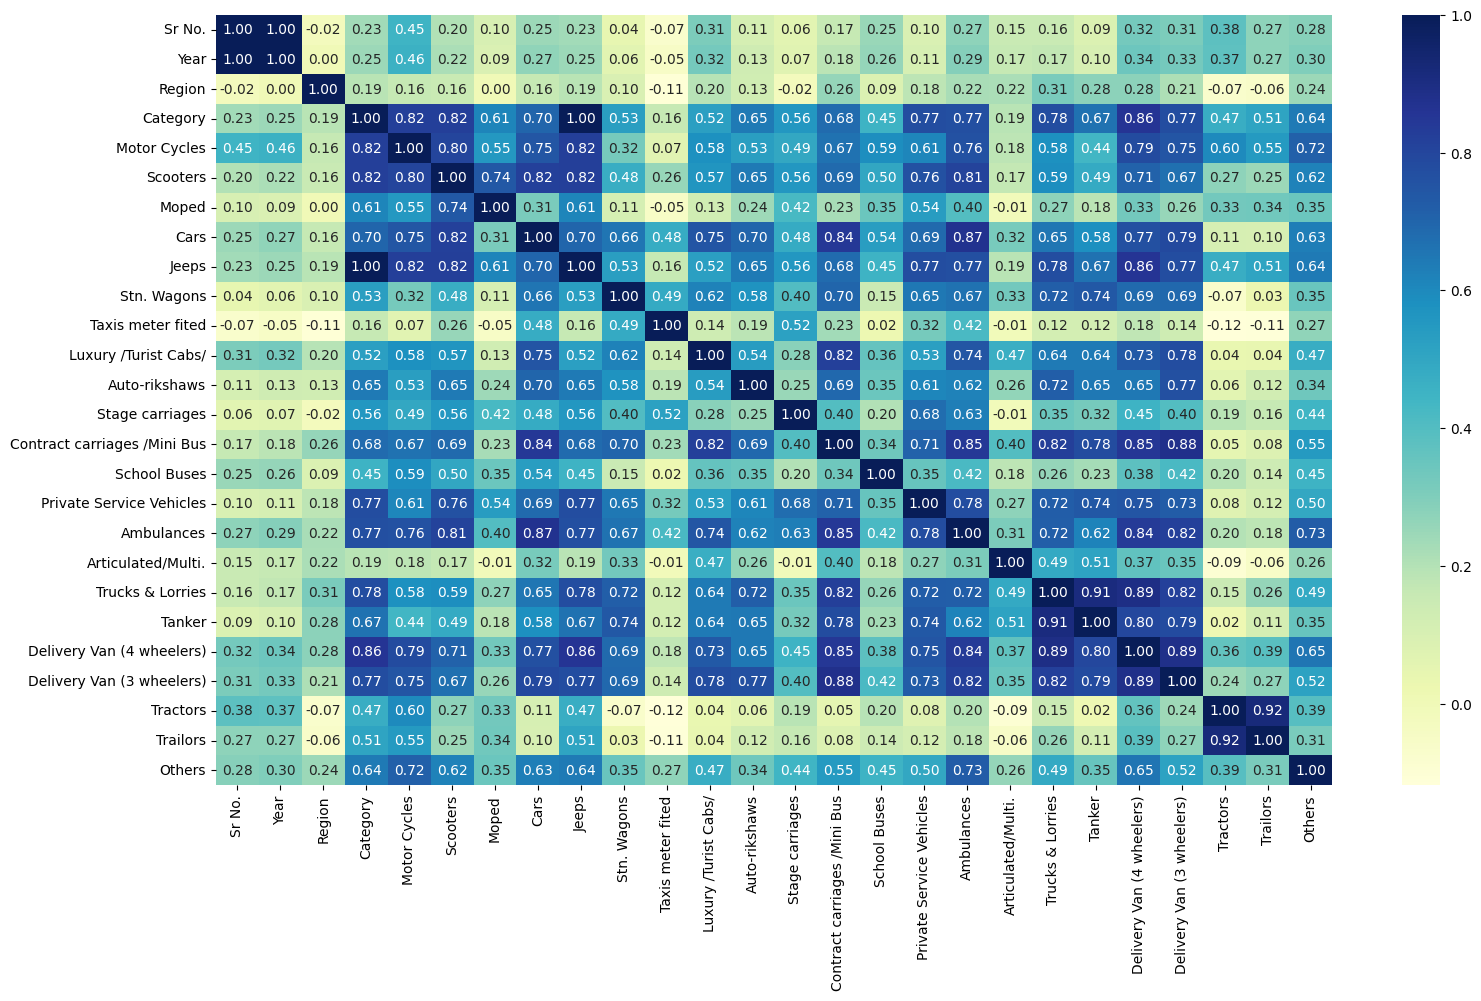

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame 'data'

# Selecting only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Checking if the numeric DataFrame is empty
if numeric_data.empty:
    raise ValueError("No numeric columns available for correlation matrix.")

# Generating the correlation matrix
corr_matrix = numeric_data.corr()

# Ploting the heatmap
plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [22]:
data['Category'] = data['Category'].astype(float)

In [23]:
# finding the outlier
percentile25=data["Category"].quantile(0.25)
percentile75=data["Category"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 109.0
lower_limit -35.0


In [24]:
#Capping
new_data_cap = data.copy()

new_data_cap["Category"] = np.where(
    new_data_cap["Category"] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap["Category"] < lower_limit,
        lower_limit,
        new_data_cap["Jeeps"]
    )
)

In [25]:
# Assigning the modified "distance" column back to the original dataset
data['Category'] = new_data_cap['Category']
upper_limit = 322250.0
lower_limit = -41350.0

In [26]:
#Spliting Data to be used in Models
#Creating matric of feature
x = data.drop('Category', axis = 1)

In [27]:
#Creating target Variables
y = data['Category']

In [28]:
#Inviestigating X data frame
print(x.dtypes)

Sr No.                            int64
Year                              int64
Region                            int64
Motor Cycles                    float64
Scooters                          int64
Moped                             int64
Cars                              int64
Jeeps                             int64
Stn. Wagons                       int64
Taxis meter fited                 int64
Luxury /Turist Cabs/              int64
Auto-rikshaws                     int64
Stage carriages                   int64
Contract carriages /Mini Bus      int64
School Buses                      int64
Private Service Vehicles          int64
Ambulances                        int64
Articulated/Multi.                int64
Trucks & Lorries                  int64
Tanker                            int64
Delivery Van (4 wheelers)         int64
Delivery Van (3 wheelers)         int64
Tractors                          int64
Trailors                          int64
Others                            int64


In [29]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.3,random_state=101)

In [31]:
x_transform

array([[-1.73012737e+00, -1.63835604e+00, -8.10304881e-01, ...,
        -7.32714553e-01, -7.72350227e-01,  2.91900054e+00],
       [-1.72627837e+00, -1.63835604e+00, -8.10304881e-01, ...,
        -7.88267170e-01, -8.96104682e-01, -1.19058865e-01],
       [-1.72242937e+00, -1.63835604e+00, -8.10304881e-01, ...,
        -8.15764039e-01, -8.88903814e-01,  1.87715506e-03],
       ...,
       [ 1.72242937e+00,  1.63835604e+00, -3.11655723e-02, ...,
         6.87845227e-01,  2.60555691e-01,  4.04081039e-01],
       [ 1.72627837e+00,  1.63835604e+00, -3.11655723e-02, ...,
         1.76246981e-01, -4.45601627e-02, -2.92217257e-01],
       [ 1.73012737e+00,  1.63835604e+00, -3.11655723e-02, ...,
         4.29419370e-01,  7.06537270e-02, -3.59098541e-01]])